In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import linalg
import numpy as np

In [2]:
data = loadmat('data/number.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
x = data['X']
x.shape

(5000, 400)

In [4]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [5]:
U, S, V = linalg.svd(x_scaled.T)

In [6]:
variance = np.sum(S[:200])/np.sum(S)
variance

0.8575968087473566

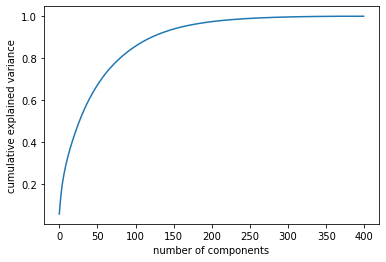

In [7]:
pca = PCA().fit(x_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [8]:
np.cumsum(pca.explained_variance_ratio_)[200]

0.9744251199871645

In [9]:
pca = PCA(n_components=200, svd_solver='full')
pca.fit(x_scaled)
x_pac = pca.transform(x_scaled)
x_pac.shape

(5000, 200)

In [10]:
pca.components_.shape

(200, 400)

In [11]:
filtered = pca.inverse_transform(x_pac)
filtered.shape

(5000, 400)

In [12]:
sample = np.random.choice(x.shape[0], 20)
plt.imshow(x[sample].reshape(-1,20).T)
plt.axis('off');

In [13]:
plt.imshow(filtered[sample].reshape(-1,20).T)
plt.axis('off');